# GDS Project Data collection and proccesing

### Environment setup
+ Dokumentieren 

## Analyse
### Korrelation zwischen
+ Saisonal
+ Tageszeit (Peaks zum beispiel)
+ Wochentag
+ (Lichtverhältnisse)
+ Stadtteil
+ Beteiligte Fahrzeugtypen
### Cluster Analyse
+ K nearest or anything
### Further ideas
+ Monte Carlo test

In [1]:
# csv file laden
import geopandas as gpd

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [2]:
df = gpd.read_file("work/Exercises/gds/Data/Shapefile/Unfallorte2021_LinRef.shp")

In [3]:
df.head()
df_bike = df[df["IstRad"] == "1"]

In [4]:
df_bike.size

1864148

In [5]:
df_bike.head()

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAN,geometry
2,3,01210610181013902021,01,0,61,007,2021,06,13,5,...,0,0,0,1,527231.388501,5.972658e+06,9.414457,53.901645,0,POINT (527231.389 5972658.256)
3,4,01210524161013132021,01,0,53,041,2021,05,11,2,...,0,0,0,0,614902.973625,5.963897e+06,10.745101,53.810913,0,POINT (614902.974 5963896.514)
4,5,01210529152013382022,01,0,55,032,2021,05,15,7,...,0,0,0,0,617331.180263,5.996138e+06,10.794357,54.100018,0,POINT (617331.180 5996138.283)
6,7,01210512171013412021,01,0,56,037,2021,05,14,4,...,0,0,0,0,540082.958405,5.947625e+06,9.606790,53.675817,0,POINT (540082.958 5947624.890)
7,8,01210325105132862021,01,0,56,043,2021,03,06,5,...,0,0,0,0,555471.603000,5.943956e+06,9.839070,53.641432,0,POINT (555471.603 5943955.564)


In [6]:
df_bike.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

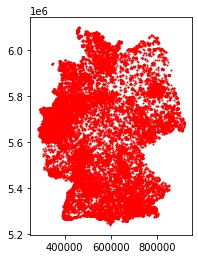

In [7]:
# plot points in df_bike
df_bike.plot(marker="o", color="red", markersize=1)

In [8]:
df_bike_hh = df_bike[df_bike["ULAND"] == "02"]

In [9]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [10]:
# get districts of hamburg from shapefile
df_districts = gpd.read_file("work/Exercises/gds/Data/hh_districts/Stadtteile_Hamburg.shp")

In [11]:
df_bike_hh.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
df_districts = df_districts.to_crs("EPSG:25832")

In [13]:
# import ctx
import contextily as ctx
import matplotlib.pyplot as plt

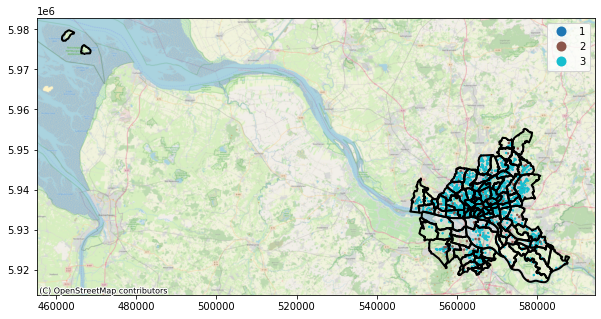

In [14]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=2)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


In [15]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [16]:
# correlation matrix of bike accidents in hamburg
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

# filter by cols
df_bike_hh_corr = df_bike_hh[cols]

# convert to int
df_bike_hh_corr = df_bike_hh_corr.astype(int)

# calculate correlation matrix for categorical variables
corr = df_bike_hh_corr.corr(method="spearman")


In [17]:
corr

,UKATEGORIE,UART,UMONAT,USTUNDE,UWOCHENTAG,UTYP1,ULICHTVERH,IstPKW,IstKrad,IstGkfz,IstSonstig
UKATEGORIE,1.000000,0.012461,0.011443,-0.007444,-0.008974,-0.027908,0.004282,0.049074,0.029275,-0.053836,0.015454
UART,0.012461,1.000000,-0.039441,-0.007978,0.050172,-0.426924,-0.079056,0.330156,0.016108,-0.014264,0.006139
UMONAT,0.011443,-0.039441,1.000000,-0.060132,-0.059842,-0.029006,0.165269,0.008190,-0.012014,0.002998,0.015651
USTUNDE,-0.007444,-0.007978,-0.060132,1.000000,0.003039,0.020680,0.181074,-0.000519,-0.008425,-0.011553,-0.017097
UWOCHENTAG,-0.008974,0.050172,-0.059842,0.003039,1.000000,-0.033804,-0.007024,-0.011759,0.012539,0.025208,0.020285
UTYP1,-0.027908,-0.426924,-0.029006,0.020680,-0.033804,1.000000,0.012458,-0.443717,-0.018372,-0.026596,-0.044571
ULICHTVERH,0.004282,-0.079056,0.165269,0.181074,-0.007024,0.012458,1.000000,-0.042192,0.011180,-0.017333,-0.007893
IstPKW,0.049074,0.330156,0.008190,-0.000519,-0.011759,-0.443717,-0.042192,1.000000,-0.085905,-0.116564,-0.339482
IstKrad,0.029275,0.016108,-0.012014,-0.008425,0.012539,-0.018372,0.011180,-0.085905,1.000000,-0.010080,-0.031191
IstGkfz,-0.053836,-0.014264,0.002998,-0.011553,0.025208,-0.026596,-0.017333,-0.116564,-0.010080,1.000000,-0.038280


<Axes: >

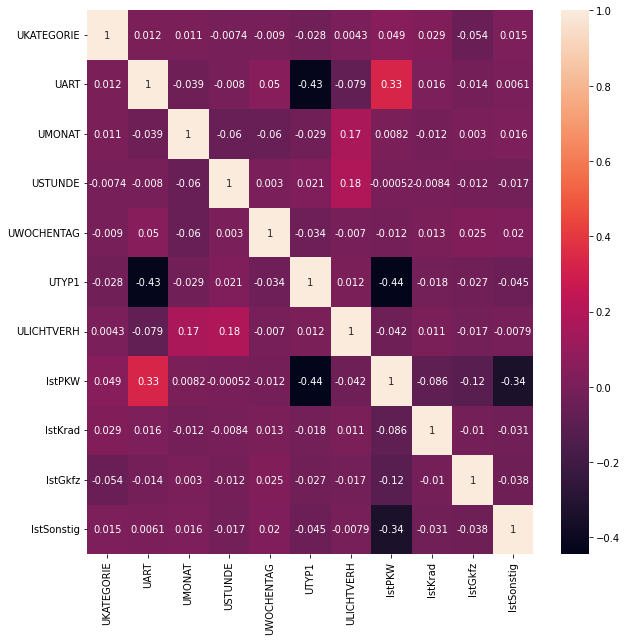

In [18]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)


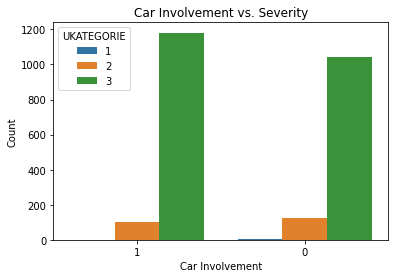

In [19]:
car_involvement = df_bike_hh['IstPKW']
severity = df_bike_hh['UKATEGORIE']
# sort severity
severity = severity.sort_values()

# Create a bar chart
sns.countplot(x=car_involvement, hue=severity)
plt.xlabel('Car Involvement')
plt.ylabel('Count')
plt.title('Car Involvement vs. Severity')
plt.show()

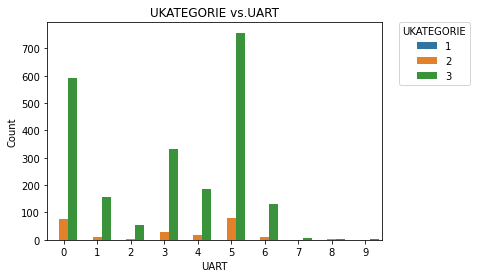

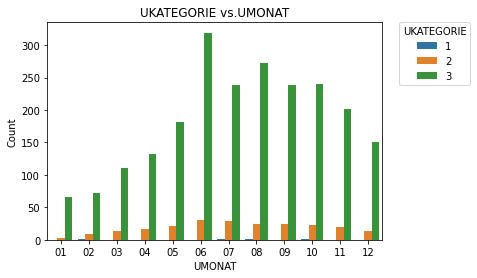

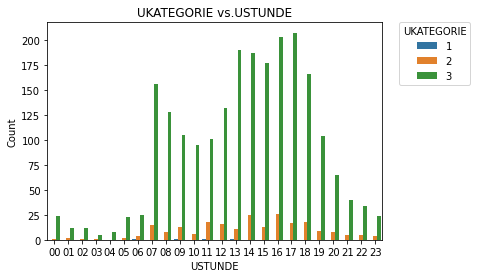

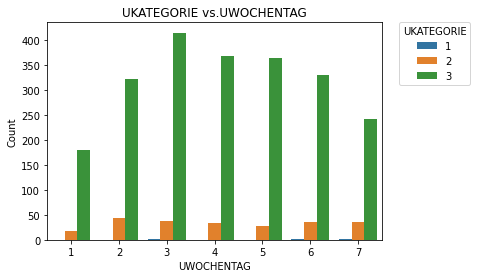

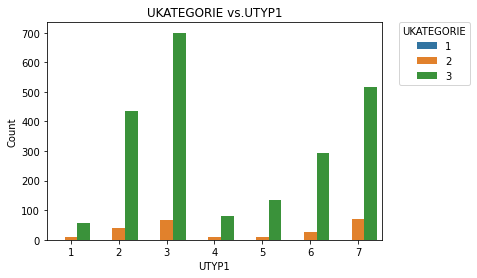

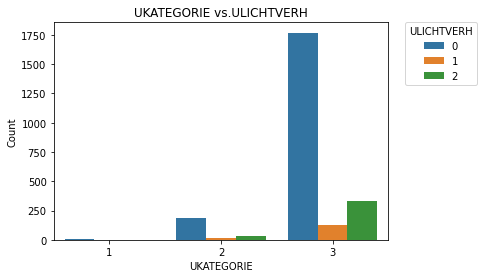

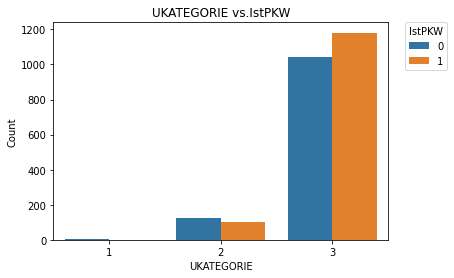

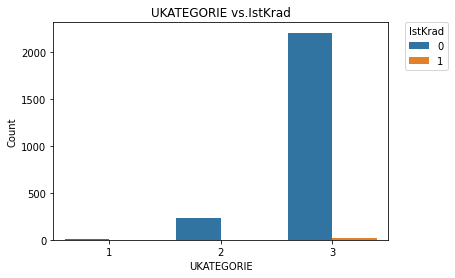

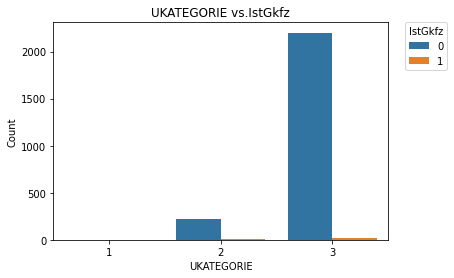

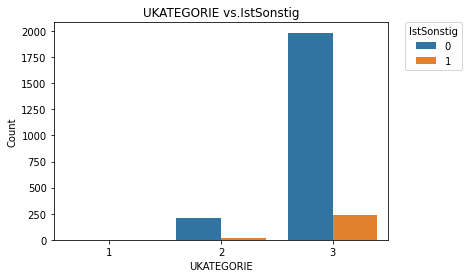

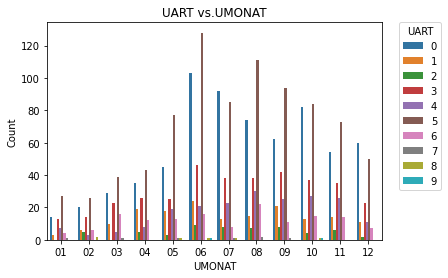

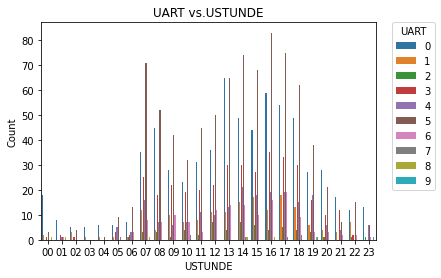

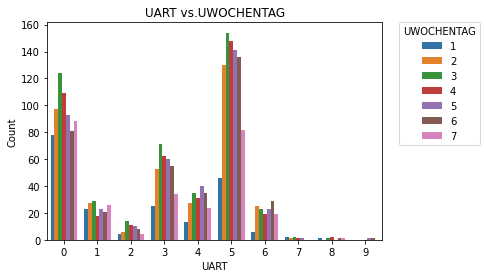

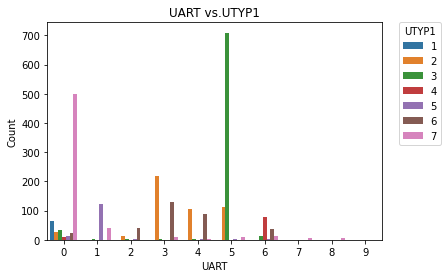

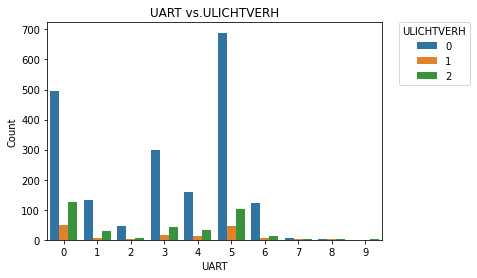

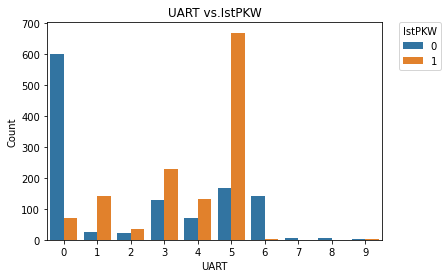

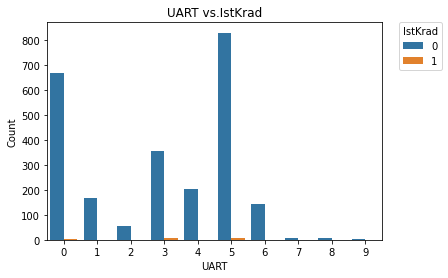

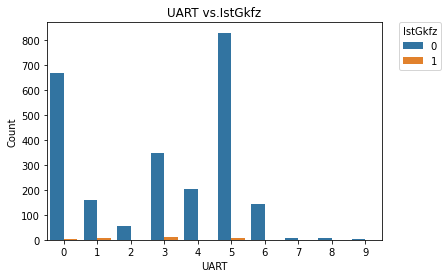

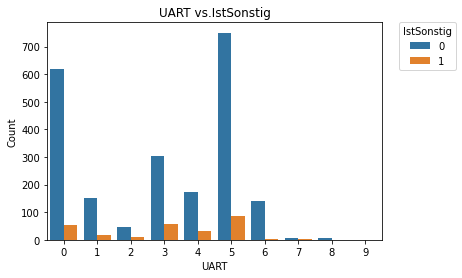

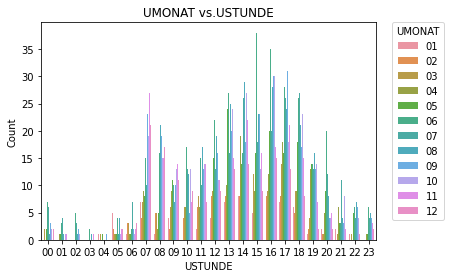

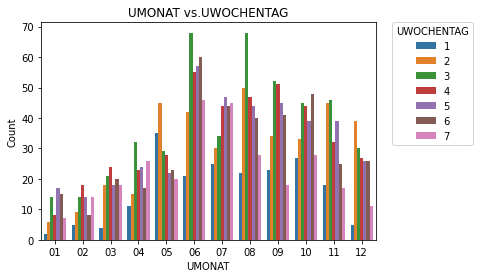

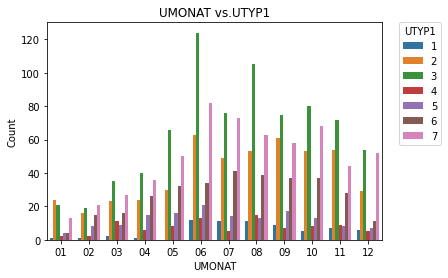

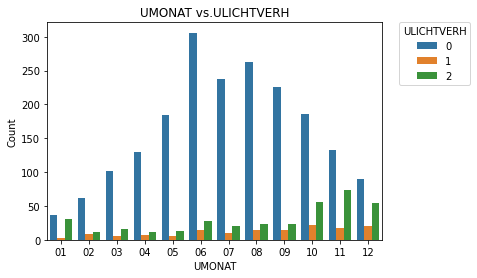

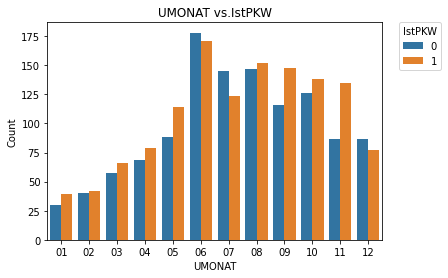

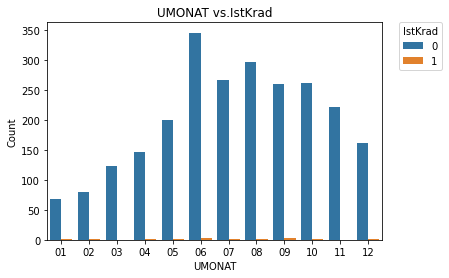

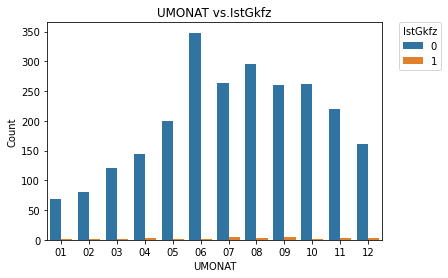

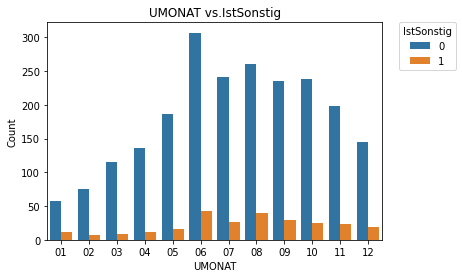

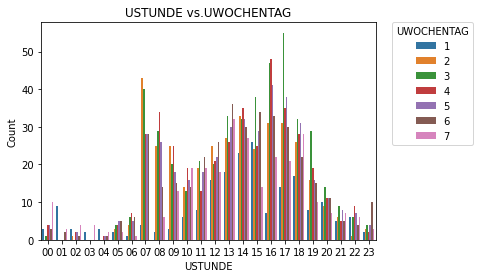

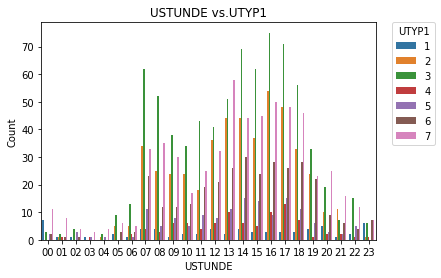

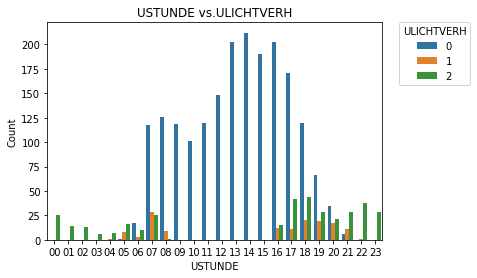

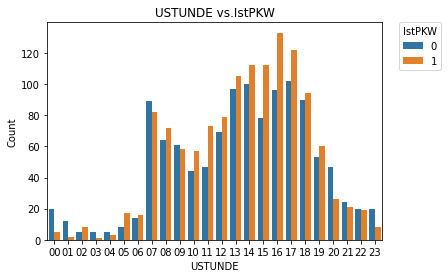

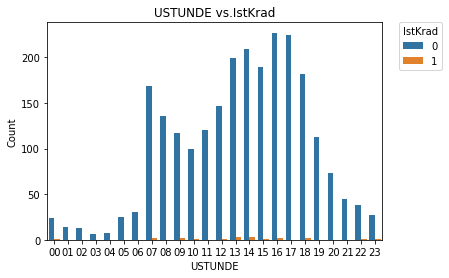

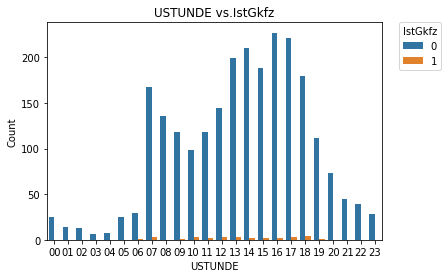

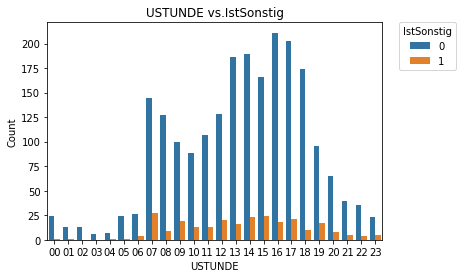

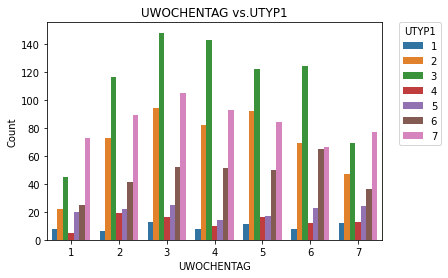

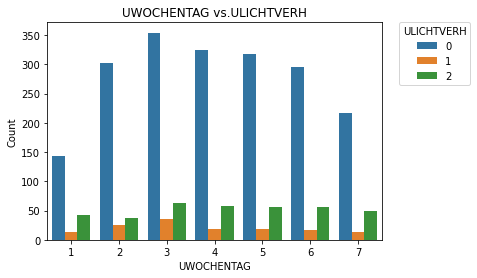

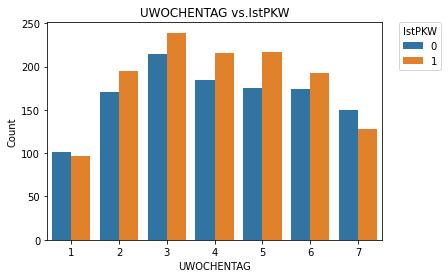

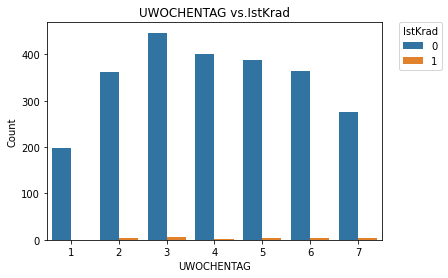

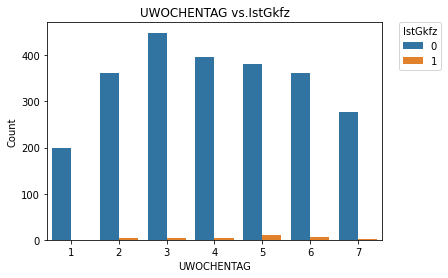

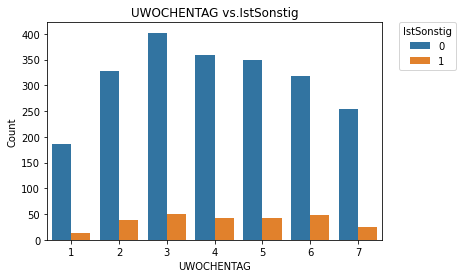

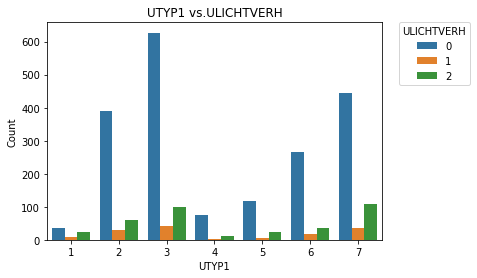

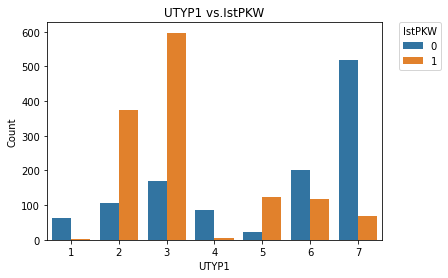

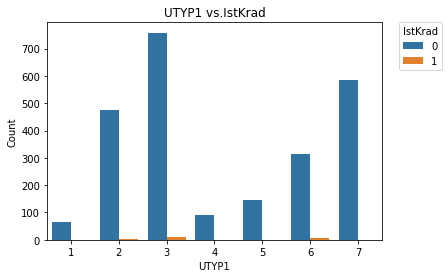

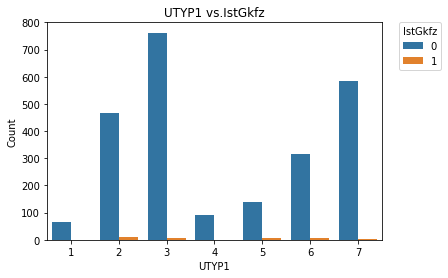

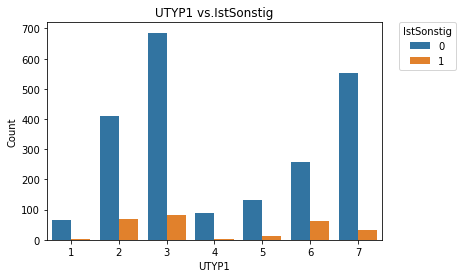

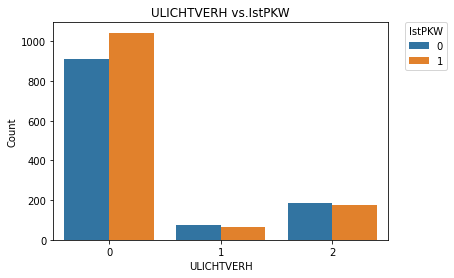

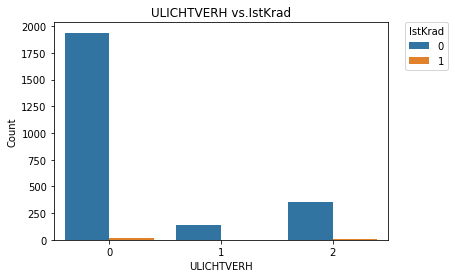

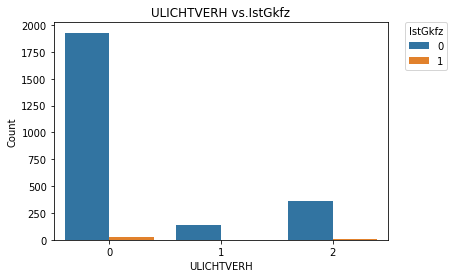

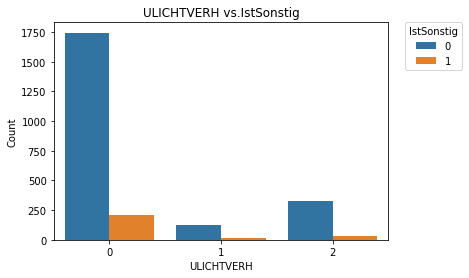

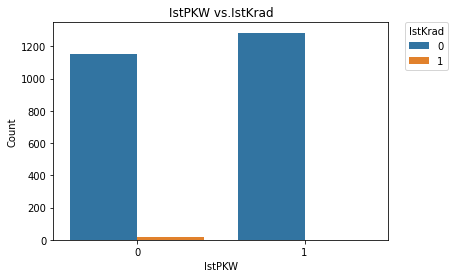

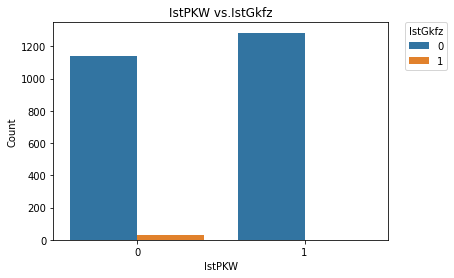

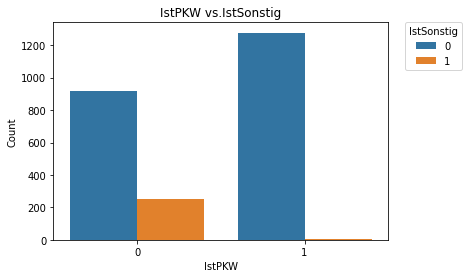

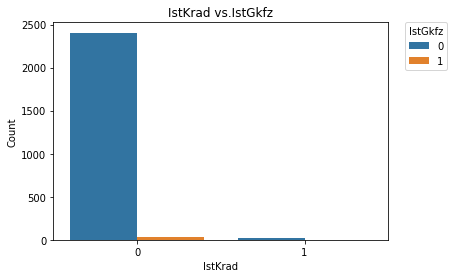

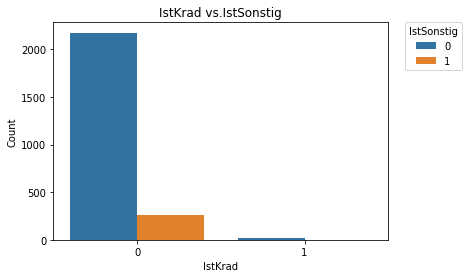

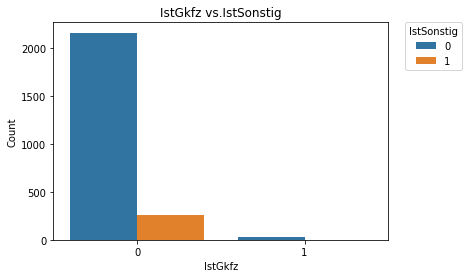

In [20]:
# plot categorical variables vs other categorical variables
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

for col1 in cols:
    # continue from col1 + 1
    for col2 in cols[cols.index(col1) + 1:]:
        # plot categorical variables vs other categorical variables
        x = df_bike_hh[col1]
        y = df_bike_hh[col2]
        x = x.sort_values()
        y = y.sort_values()
        # Create a bar chart
        # use shorter as hue
        shorter = x if len(x.unique()) < len(y.unique()) else y
        longer = y if len(x.unique()) < len(y.unique()) else x
        sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
        # place legend outside of plot showing title of hue

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
        plt.xlabel(longer.name)
        plt.ylabel('Count')
        plt.title(col1 + ' vs.' + col2)
        plt.show()

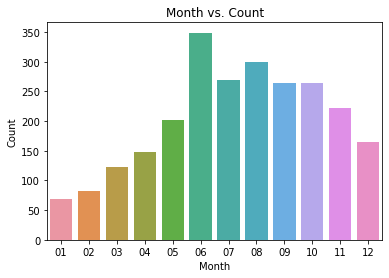

In [21]:
# plot count of values for "UMONAT"
x = df_bike_hh["UMONAT"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month vs. Count')
plt.show()

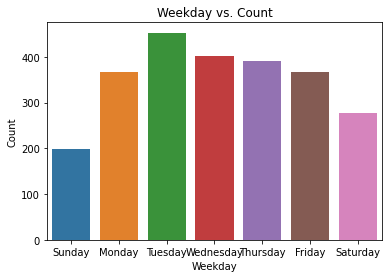

In [22]:
# plot count of values for "UWOCHENTAG"
x = df_bike_hh["UWOCHENTAG"]
x = x.sort_values()
days = {1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        7: "Saturday"}

sns.countplot(x=x)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [days[1], days[2], days[3], days[4], days[5], days[6], days[7]])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Weekday vs. Count')
plt.show()

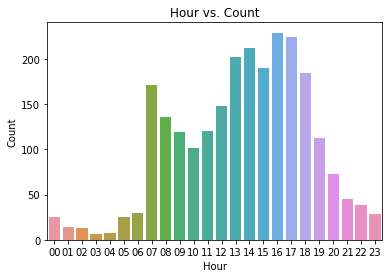

In [23]:
# plot count of values for "USTUNDE"
x = df_bike_hh["USTUNDE"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour vs. Count')
plt.show()

In [30]:
# calculate ratio of "IstPKW" == 1 and "IstPKW" == 0 for each "STUNDE"
df_bike_hh["IstPKW"] = df_bike_hh["IstPKW"].astype(int)

ratio_dict = {}

for hour in df_bike_hh["USTUNDE"].unique():
    df_hour = df_bike_hh[df_bike_hh["USTUNDE"] == hour]
    # calculate ratio
    ratio = df_hour[df_hour["IstPKW"] == 1].size / df_hour[df_hour["IstPKW"] == 0].size
    ratio_dict[hour] = ratio
    # print("Ratio of IstPKW == 1 and IstPKW == 0 for hour {}: {}".format(hour, ratio))

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


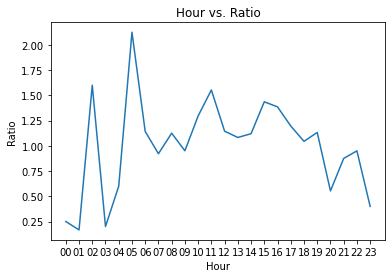

In [31]:
# plot ratio_dict
# sort by key (hour)
ratio_dict = {k: v for k, v in sorted(ratio_dict.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict.keys()), y=list(ratio_dict.values()))
plt.xlabel('Hour')
plt.ylabel('Ratio')
plt.title('Hour vs. Ratio')
plt.show()

In [27]:
# split "UMONAT" into seasons
df_bike_hh["UMONAT"] = df_bike_hh["UMONAT"].astype(int)
df_bike_hh["season"] = df_bike_hh["UMONAT"].apply(lambda x: "winter" if x in [1, 2, 12] else "spring" if x in [3, 4, 5] else "summer" if x in [6, 7, 8] else "autumn")

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


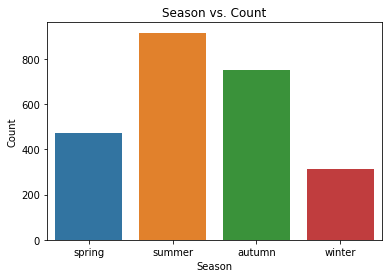

In [35]:
# plot count of values for "season"
x = df_bike_hh["season"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
sns.countplot(x=x)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season vs. Count')
plt.show()

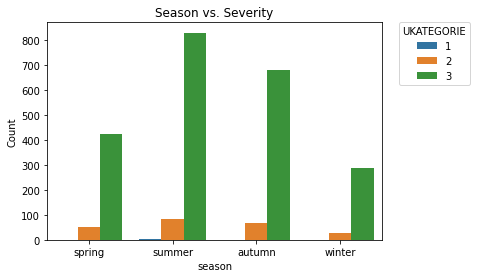

In [39]:
# plot season vs "UKATEGORIE"
x = df_bike_hh["season"]
y = df_bike_hh["UKATEGORIE"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
y = y.sort_values()
# Create a bar chart
# use shorter as hue
shorter = x if len(x.unique()) < len(y.unique()) else y
longer = y if len(x.unique()) < len(y.unique()) else x
sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
# place legend outside of plot showing title of hue
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
plt.xlabel(longer.name)
plt.ylabel('Count')
plt.title('Season vs. Severity')
plt.show()


In [60]:
# season vs ratio of severity

ratio_dict_severity = {}
for season in df_bike_hh["season"].unique():
    df_season = df_bike_hh[df_bike_hh["season"] == season]
    sum = df_season.size
    fatal_ratio = df_season[df_season["UKATEGORIE"] == "1"].size / sum
    severe_ratio = df_season[df_season["UKATEGORIE"] == "2"].size / sum
    slight_ratio = df_season[df_season["UKATEGORIE"] == "3"].size / sum
    
    ratio = [fatal_ratio, severe_ratio, slight_ratio]
    ratio_dict_severity[season] = ratio


In [59]:
ratio_dict_severity

{'autumn': [0.0013333333333333333, 0.09066666666666667, 0.908],
 'winter': [0.0031746031746031746, 0.08253968253968254, 0.9142857142857143],
 'summer': [0.0021810250817884407, 0.0916030534351145, 0.906215921483097],
 'spring': [0.0, 0.10570824524312897, 0.8942917547568711]}

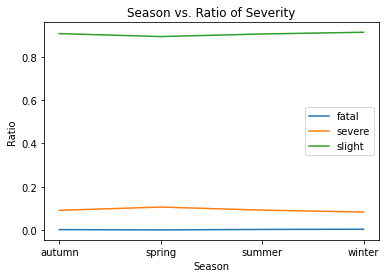

In [63]:
# plot ratio_dict_severity
# sort by key (season)
ratio_dict_severity = {k: v for k, v in sorted(ratio_dict_severity.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[0] for x in list(ratio_dict_severity.values())], label="fatal")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[1] for x in list(ratio_dict_severity.values())], label="severe")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[2] for x in list(ratio_dict_severity.values())], label="slight")
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.title('Season vs. Ratio of Severity')
plt.show()

### Spatial Autocorrealtion